<a href="https://colab.research.google.com/github/YaeliBarGimelshtein/ML_HW1/blob/main/Machine_Learning_hw1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster ⚓

Yaeli Bar Gimelshtein 208722710

Kaggle: https://www.kaggle.com/yaeligimelshtein

## Exercise 1 ⏰




The Titainic competition is a classification model of ML.

We calssify for each passanger on the Titanic whether he survived or didnt.

I will use 2 ML algorithms:


1.   Logistic Regression
2.   Multy Layer Perceptron (Gadi explained that thats a wrong name since it is a sigmoid and not perceptron)

### **Step 1: Data Investigation and Preprocessing** 🔽

In [ ]:
#Imports
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neural_network
from sklearn import linear_model
from sklearn import metrics

In [ ]:
#Load the data
dataset = pd.read_csv('train.csv')

In [ ]:
#Show the data
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Now, I will learn and understand the data.

I will start with getting the `keys` of this dataset and understand what each of them represent.

In [ ]:
print(dataset.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


As we can see there are 12 keys:

1. `PassengerId` id of a passanger
2. `Survived`  0 = No, 1 = Yes
3. `Pclass`  Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
4. `Name`  Name of a passanger
5. `Sex`  sex of a passanger
6. `Age`  Age in years of a passanger
7. `SibSp`  number of siblings / spouses aboard the Titanic
8. `Parch`  number of parents / children aboard the Titanic
9. `Ticket`  Ticket class
10. `Fare`  Passenger fare
11. `Cabin`  Cabin number
12. `Embarked`  Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

#### **Feature Engineering**⏬

Now, I need to understand the type of the features to make sure my model can learn it perfectly

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I will start by identifing for each key the mathematical and statistical definision:

> `PassengerId` Discrete variable, each passanger has its own id, represnts by an int that can be read by the model

> `Survived`  Discrete binary variable, each passanger survived or not, represnts by an int that can be read by the model

> `Pclass` Ordinal (Categorial) variable, the first class is "better" that second that is "better" than the third, represnts by an int that can be read by the model

> `Name` Not a mathmatical variable, doesnt effect the outcome of the Titanic disaster, represnts by an object that can not be read perfectly by the model

> `Sex` Discrete Categorial binary  variable, each passanger is a man or a woman, represnts by an object that can not be read perfectly by the model

> `Age` Interval variable, each passanger has its own age, represnts by an int that can be read by the model

> `SibSp` Discrete  variable, each passanger has a numner of sibllings or spouses on board, represnts by an int that can be read by the model

> `Parch` Discrete  variable, each passanger has a numner of parents or children on board, represnts by an int that can be read by the model

> `Ticket` Discrete variable, each passanger has a ticket with a unique number, represnts by an object that can not be read perfectly by the model

> `Fare` Continuous variable, each passanger paid a different amount, represnts by a float that can be read by the model

> `Cabin` Discrete variable, each passanger has a cabin with a unique number, represnts by an object that can not be read perfectly by the model

> `Embarked`  Discrete Categorial variable, each passanger embarked from one of three ports, represnts by an object that can not be read perfectly by the model

So, in conclusion, I will have to change the way `Sex` , `Ticket` , `Cabin` and `Embarked` are represented in the `dataset` if i would end up using this features

Now, I need to check if there are any missing values in the features

In [ ]:
# check if there is missing data
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
# count empty values in each column function
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

In [ ]:
# count empty values in each column in the dataset
count_empty_values_in_each_column(dataset) 

empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


So, in conclusion, I will have to **fill up** `Age` , `Cabin` and `Embarked` in order to use them as features that the model will learn

### Changing the dataset

As mentioned above, there are  features that are not represented by an python number: `Sex` , `Ticket` , `Cabin`, `Name` and `Embarked`, and also the is missing values in `Age` , `Cabin` and `Embarked`

*Dropping features* ✒

After carefully looking at the data, I decided to drop: 


1.   `Cabin` there is just to much data missing to fill it up (687 missing rows) and also it is a string that I would not have been able to represent as a number
2.   `Name` there is no real connection between the name of a person and if he survived and also it is a string that I would not have been able to represent as a number

3. `Ticket` there is no way to encode it to numbers, and the `Pclass` will have the same kind of connection to survival

4. `PassengerId` feature to only make order in the dataset

In [ ]:
dataset_less_fueatures = dataset.copy()
# remove unneeded columns
dataset_less_fueatures.drop(columns='Name', inplace = True, axis =1) # remove the name column!
dataset_less_fueatures.drop(columns='Cabin', inplace = True, axis =1) # remove the cabin column!
dataset_less_fueatures.drop(columns='Ticket', inplace = True, axis =1) # remove the ticket column!
dataset_less_fueatures.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!

# show the new dataset
dataset_less_fueatures

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


*fill the missing values* ✒

Looking at the data, I decided to fill:


1.   `Embarked` since there are only 2 values missing, i will fill them with random values of the column
2.   `Age` since there are 177 missing values,  i will fill them with the mean of the column

In [ ]:
# fill empty values in the dataset , 3 ways
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

In [ ]:
# filling in the missing values in Embarked
dataset_less_fueatures_and_filled_values = dataset_less_fueatures.copy()
fill_na_random_pick_column_distribution(dataset_less_fueatures_and_filled_values, 'Embarked')
count_empty_values_in_each_column(dataset_less_fueatures_and_filled_values)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


In [ ]:
# filling in the missing values in Age
fill_na_median(dataset_less_fueatures_and_filled_values, 'Age') #fill age nans with median value ---- maybe mean is better
count_empty_values_in_each_column(dataset_less_fueatures_and_filled_values)

empty values
------------

Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0


As we can see, now there are no missing values at all

*Encoding Categorial Values* ✒

As said above, there are 3 features that are categorial:


1.   `Sex`
2.   `Pclass`
3.   `Embarked`


I will encode them, using the dummy encoding.

In [ ]:
# dummy encode the categorical variables in the df with get_dummies
dataset_less_fueatures_and_filled_values_encoded = dataset_less_fueatures_and_filled_values.copy()
dataset_less_fueatures_and_filled_values_encoded = pd.get_dummies(dataset_less_fueatures_and_filled_values_encoded, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,28.0,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


#### **Pre Processing**⏬

now, I will try to change the features by creating or dropping more columns and check the correlation to make sure the features are helping my goal of creating a learning model.

### Adding columns

It is logical to guess there is a connection between `SibSp` and `Parch` . So, I will add them as a new column.

In [ ]:
# add new column for relatives from sibSp + Parch
dataset_less_fueatures_and_filled_values_encoded['Relatives'] = dataset_less_fueatures_and_filled_values_encoded.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,0,22.0,1,0,7.2500,1,0,1,0,1,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,1,0,0,1,0
887,1,19.0,0,0,30.0000,0,0,0,0,1,0
888,0,28.0,1,2,23.4500,0,0,1,0,1,3
889,1,26.0,0,0,30.0000,1,0,0,0,0,0


Now, I will start understanding the connections between all of these features by ussing a pair plot and Correlation.

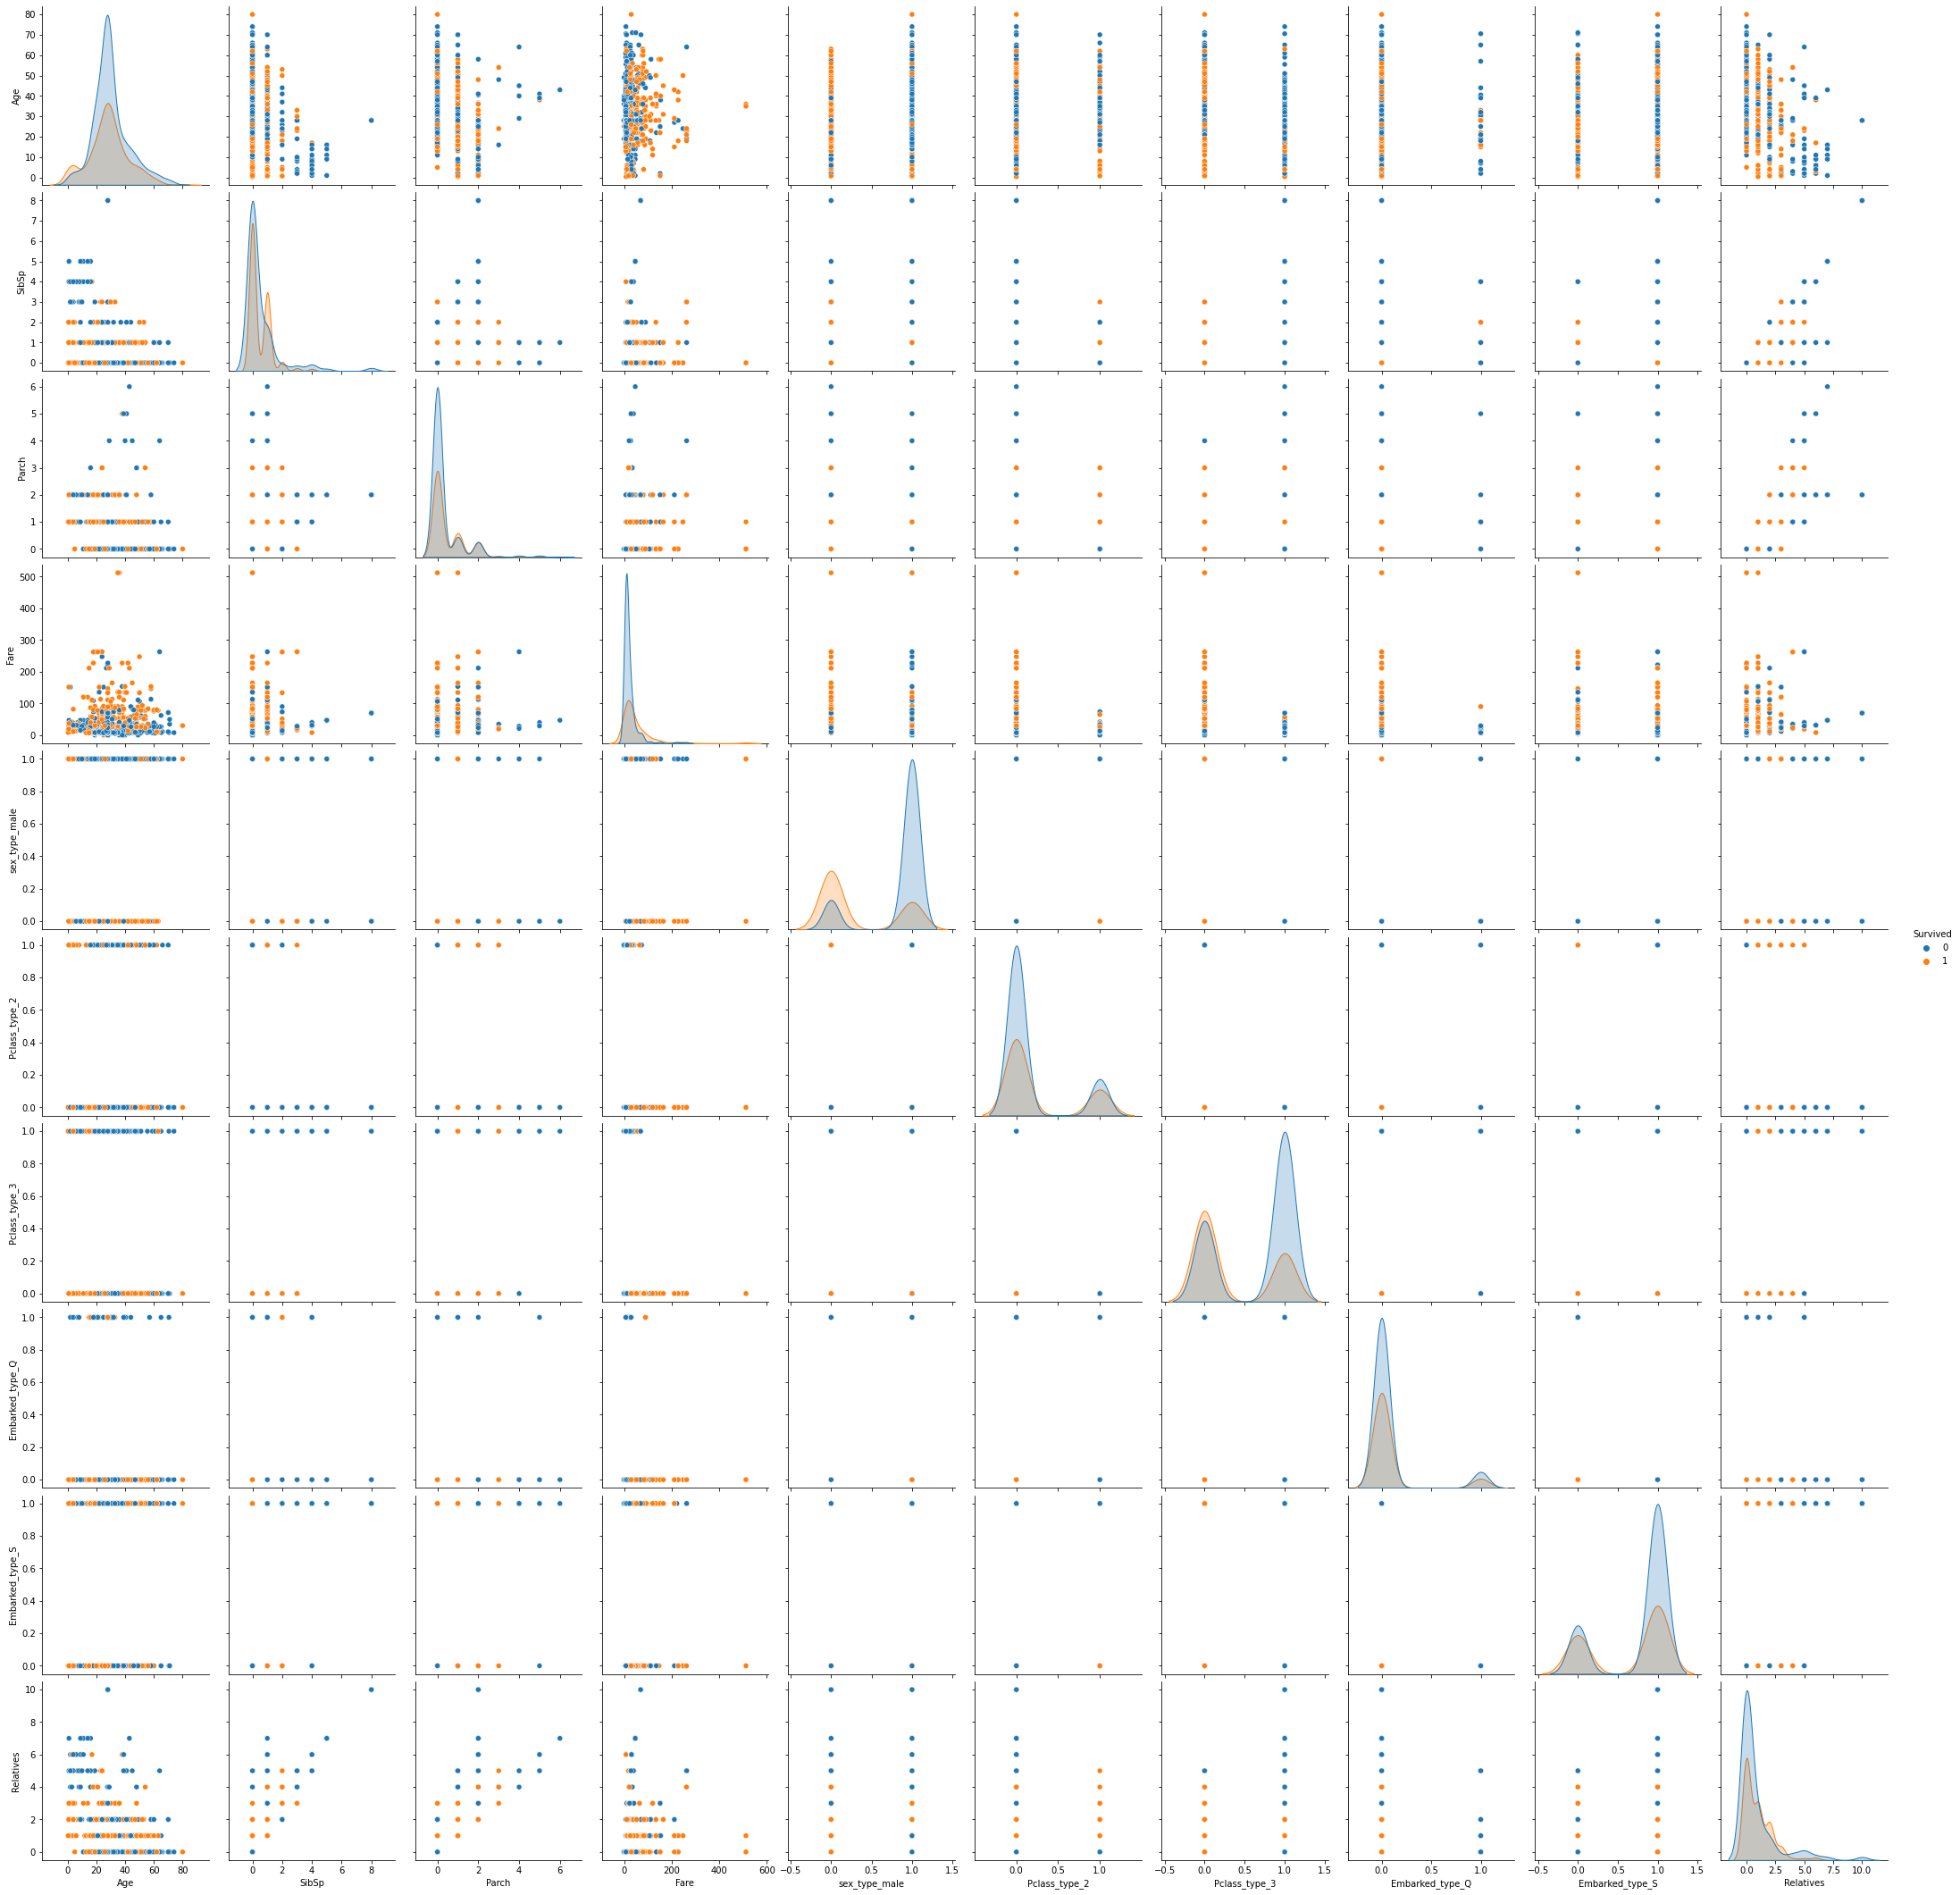

In [ ]:
# show pairplot of the features
sns.pairplot(data=dataset_less_fueatures_and_filled_values_encoded, hue="Survived", height=3)

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. 


But when we have more than two categories for the categorical variable the Pearson correlation is not appropriate anymore. Checking if two categorical variables are independent can be done with Chi-Squared test of independence.


This is a typical Chi-Square test: if we assume that two variables are independent, then the values of the contingency table for these variables should be distributed uniformly. And then we check how far away from uniform the actual values are.


There also exists a Crammer's V that is a measure of correlation that follows from this test


So, I will use Cramer's V, that is based on Chi - square test.

reference: https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix &&
https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab

In [ ]:
# Building of the Cramer's V function
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
# Building of the matrix

rows= []

for var1 in dataset_less_fueatures_and_filled_values_encoded:
  col = []
  for var2 in dataset_less_fueatures_and_filled_values_encoded :
    cramers =cramers_V(dataset_less_fueatures_and_filled_values_encoded[var1], dataset_less_fueatures_and_filled_values_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = dataset_less_fueatures_and_filled_values_encoded.columns, index =dataset_less_fueatures_and_filled_values_encoded.columns)

df

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
Survived,1.00,0.13,0.04,0.03,0.48,0.29,0.01,0.10,0.00,0.02,0.09
Age,0.13,1.00,0.14,0.18,0.30,0.10,0.15,0.22,0.15,0.14,0.14
SibSp,0.04,0.14,1.00,0.06,0.75,0.05,0.02,0.05,0.01,0.01,0.59
Parch,0.03,0.18,0.06,1.00,0.40,0.07,0.01,0.01,0.01,0.01,0.25
Fare,0.48,0.30,0.75,0.40,1.00,0.41,0.94,0.98,0.91,0.90,0.88
sex_type_male,0.29,0.10,0.05,0.07,0.41,1.00,0.00,0.02,0.00,0.01,0.11
Pclass_type_2,0.01,0.15,0.02,0.01,0.94,0.00,0.99,0.32,0.01,0.04,0.03
Pclass_type_3,0.10,0.22,0.05,0.01,0.98,0.02,0.32,1.00,0.05,0.00,0.08
Embarked_type_Q,0.00,0.15,0.01,0.01,0.91,0.00,0.01,0.05,0.99,0.24,0.02
Embarked_type_S,0.02,0.14,0.01,0.01,0.90,0.01,0.04,0.00,0.24,0.99,0.02


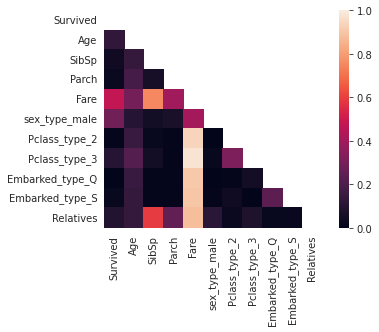

In [ ]:
# Add a heatmap to the matrix
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

As we can see, some of the strongest connections to `Survived`are:


1.   `Fare`
2.   `Sex`

And some of the weakest connections to `Survived`are:


1.   `Pclass`
2.   `Embarked`
3.   `Relatives`

As a result of the  Cramer's V test , I decided to drop some features of the data set, that are not connected strongly to `Survived`:


1.   `Parch`
2.   `SibSp`

In [ ]:
dataset_less_fueatures_and_filled_values_encoded.drop(columns='SibSp', inplace = True, axis =1) # remove the sibsp column!
dataset_less_fueatures_and_filled_values_encoded.drop(columns='Parch', inplace = True, axis =1) # remove the parch column!
dataset_less_fueatures_and_filled_values_encoded

,Survived,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,0,22.0,7.2500,1,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,1
2,1,26.0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,1
4,0,35.0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,0,1,0
887,1,19.0,30.0000,0,0,0,0,1,0
888,0,28.0,23.4500,0,0,1,0,1,3
889,1,26.0,30.0000,1,0,0,0,0,0


Now, I will check the Correlation again

In [ ]:
# Building of the matrix

rows= []

for var1 in dataset_less_fueatures_and_filled_values_encoded:
  col = []
  for var2 in dataset_less_fueatures_and_filled_values_encoded :
    cramers =cramers_V(dataset_less_fueatures_and_filled_values_encoded[var1], dataset_less_fueatures_and_filled_values_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = dataset_less_fueatures_and_filled_values_encoded.columns, index =dataset_less_fueatures_and_filled_values_encoded.columns)

df

,Survived,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
Survived,1.00,0.13,0.48,0.29,0.01,0.10,0.00,0.02,0.09
Age,0.13,1.00,0.30,0.10,0.15,0.22,0.15,0.14,0.14
Fare,0.48,0.30,1.00,0.41,0.94,0.98,0.91,0.90,0.88
sex_type_male,0.29,0.10,0.41,1.00,0.00,0.02,0.00,0.01,0.11
Pclass_type_2,0.01,0.15,0.94,0.00,0.99,0.32,0.01,0.04,0.03
Pclass_type_3,0.10,0.22,0.98,0.02,0.32,1.00,0.05,0.00,0.08
Embarked_type_Q,0.00,0.15,0.91,0.00,0.01,0.05,0.99,0.24,0.02
Embarked_type_S,0.02,0.14,0.90,0.01,0.04,0.00,0.24,0.99,0.02
Relatives,0.09,0.14,0.88,0.11,0.03,0.08,0.02,0.02,1.00


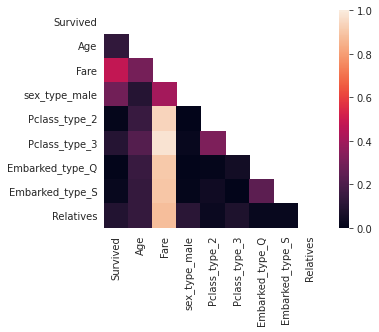

In [ ]:
# Add a heatmap to the matrix
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:
# get color map
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

# plot target values by each feature
def plot_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    plt.style.use('seaborn')
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=3, bottom=0, left=0, right=2.5)
    colors = get_cmap(len(df.columns))

    for i in range(len(df.columns)-1):
        df.plot(kind='scatter', x=df.columns[i], y=target_column_name, title=f'{df.columns[i]} by {target_column_name}', ax=axes[i//nrows, i%nrows], color=colors(i))
        axes[i//nrows, i%nrows].tick_params(axis='both', labelsize=10)
        axes[i//nrows, i%nrows].xaxis.label.set_size(10)
        axes[i//nrows, i%nrows].yaxis.label.set_size(10)
        axes[i//nrows, i%nrows].title.set_fontsize(10)

    for i in range(len(df.columns)-1, nrows*ncols): 
        fig.delaxes(axes.flatten()[i]) # Flattening so we can access axes array as a 1-d array to delete unused axes objects


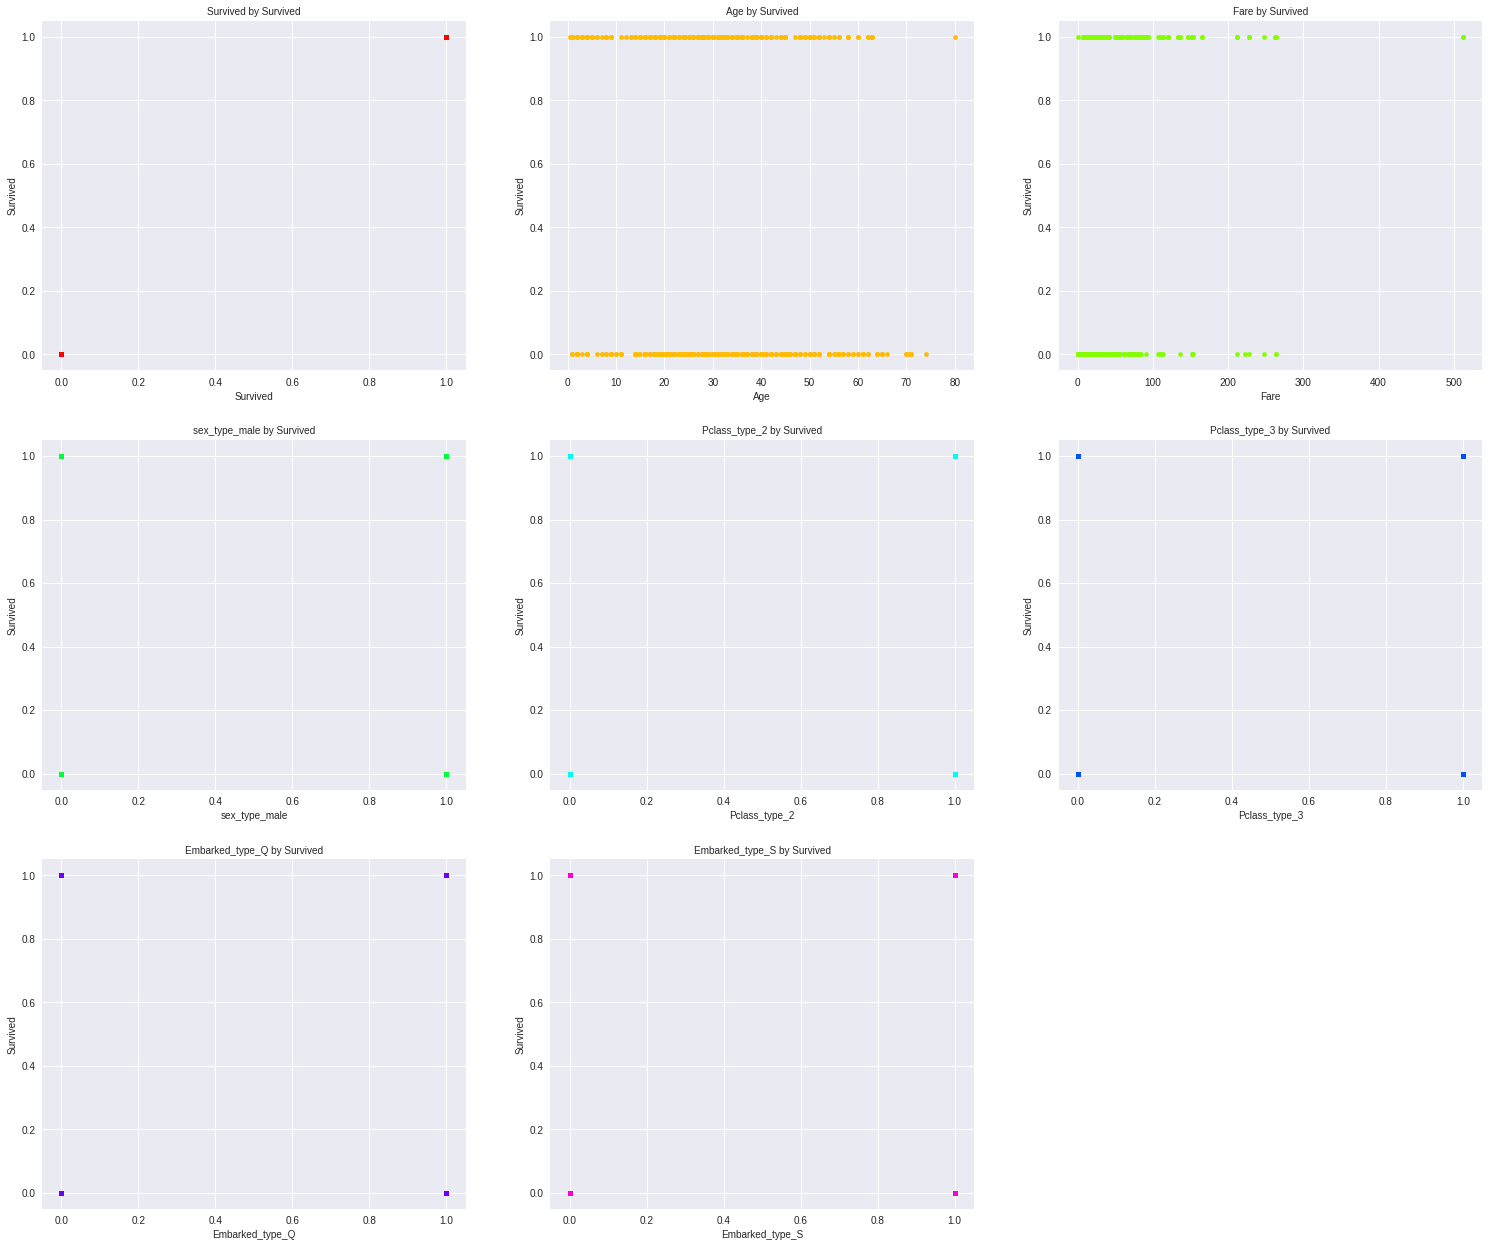

In [ ]:
plot_target_values_by_each_feature(dataset_less_fueatures_and_filled_values_encoded, 'Survived')

#### **Building the Model**⏬

I will try both MLP and logistic regression so I can choose the better one. The obvious diffrence between these 2 algoritems is that MLP is more complicated and does more transformation on the features 

In [ ]:
t = dataset_less_fueatures_and_filled_values_encoded['Survived']
x = dataset_less_fueatures_and_filled_values_encoded.drop('Survived', axis=1)

x_train, x_validation, t_train, t_validation = train_test_split(x, t, test_size=0.15, random_state=2)

In [ ]:
# normalize values: 
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_validation_norm = sc.transform(x_validation)

In [ ]:
# train the model with logic reg SGD
logicReg = linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01).fit(x_train_norm, t_train)
y_train_prob = logicReg.predict_proba(x_train_norm)
y_validation_prob = logicReg.predict_proba(x_validation_norm)
print('Accuracy score on train', logicReg.score(x_train_norm, t_train))
print('Accuracy score on test', logicReg.score(x_validation_norm, t_validation))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_validation, y_validation_prob))

Accuracy score on train 0.8124174372523117
Accuracy score on test 0.7835820895522388

CE on train 0.433145317094214
CE on test 0.4937000458985047


In [ ]:
# train the model with MLP
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=20000).fit(x_train_norm, t_train)
y_train_prob = MLP_cls.predict_proba(x_train_norm)
y_validation_prob = MLP_cls.predict_proba(x_validation_norm)
print('Accuracy score on train', MLP_cls.score(x_train_norm, t_train))
print('Accuracy score on test', MLP_cls.score(x_validation_norm, t_validation))
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_validation, y_validation_prob))

Accuracy score on train 0.8071334214002642
Accuracy score on test 0.753731343283582

CE on train 0.45718405535012835
CE on test 0.5009460888390022


# Working on the TEST ⚡

In [ ]:
# working on TEST data now
test_dataset = pd.read_csv('test.csv')

#save the id for submission
test_id = test_dataset['PassengerId']

test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#check what features have empty values
count_empty_values_in_each_column(test_dataset) 

empty values
------------

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


## Getting the data ready to the model ⏬

doing the entire process of the Feature Engineering and Pre Processing again for the test

In [ ]:
#fill missing embarked values with random values
fill_na_random_pick_column_distribution(test_dataset, 'Fare')
#fill age nans with median value
fill_na_median(test_dataset, 'Age') 

# dummy encode the categorical variables in the df with get_dummies
test_dataset_encoded = pd.get_dummies(test_dataset, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)

# add new column for relatives from sibSp + Parch
test_dataset_encoded['Relatives'] = test_dataset_encoded.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)

# remove unneeded columns
test_dataset_encoded.drop(columns='Name', inplace = True, axis =1) # remove the name column!
test_dataset_encoded.drop(columns='Cabin', inplace = True, axis =1) # remove the cabin column!
test_dataset_encoded.drop(columns='Ticket', inplace = True, axis =1) # remove the ticket column!
test_dataset_encoded.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!
test_dataset_encoded.drop(columns='SibSp', inplace = True, axis =1) # remove the sibsp column!
test_dataset_encoded.drop(columns='Parch', inplace = True, axis =1) # remove the parch column!



#normlize the test data
x_test_norm = sc.fit_transform(test_dataset_encoded)

In [ ]:
test_dataset_encoded

,Age,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,34.5,7.8292,1,0,1,1,0,0
1,47.0,7.0000,0,0,1,0,1,1
2,62.0,9.6875,1,1,0,1,0,0
3,27.0,8.6625,1,0,1,0,1,0
4,22.0,12.2875,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,0,1,0,1,0
414,39.0,108.9000,0,0,0,0,0,0
415,38.5,7.2500,1,0,1,0,1,0
416,27.0,8.0500,1,0,1,0,1,0


Testing the model and saving the predictions

In [ ]:
test_pred_logReg = logicReg.predict(x_test_norm)
test_pred_MLP = MLP_cls.predict(x_test_norm)

Creating a new CSV file and writing the predictions

In [ ]:
#MLP
result_MLP = pd.DataFrame()
result_MLP['PassengerId'] = test_id
result_MLP['Survived'] = test_pred_MLP
result_MLP.to_csv('Submission-MLP.csv')

#Log Reg
result_logReg = pd.DataFrame()
result_logReg['PassengerId'] = test_id
result_logReg['Survived'] = test_pred_logReg
result_logReg.to_csv('Submission-logReg.csv')

## Submmitimg To Kaggle ⚡

I have submitted both of my tests

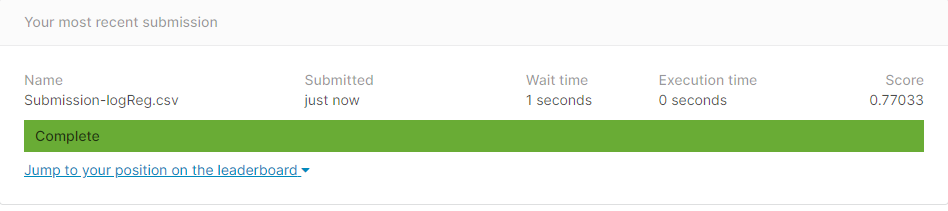

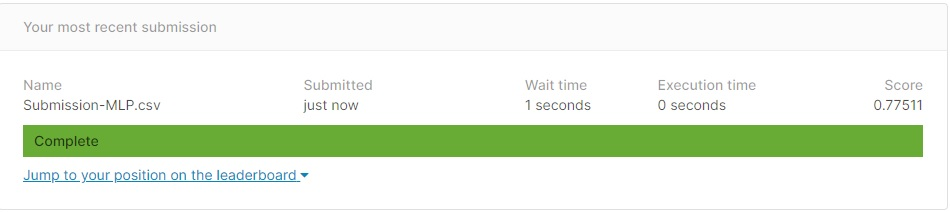

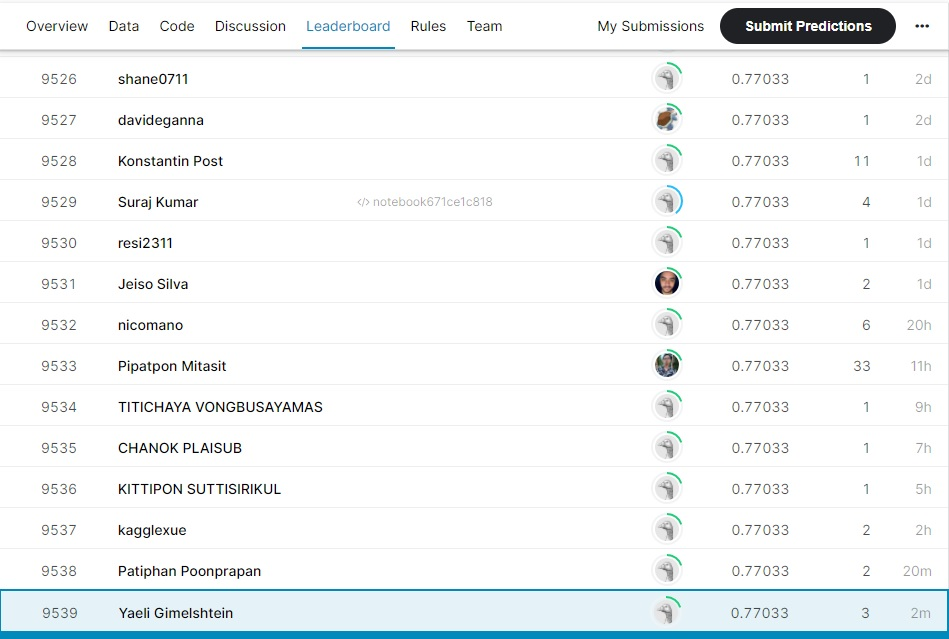

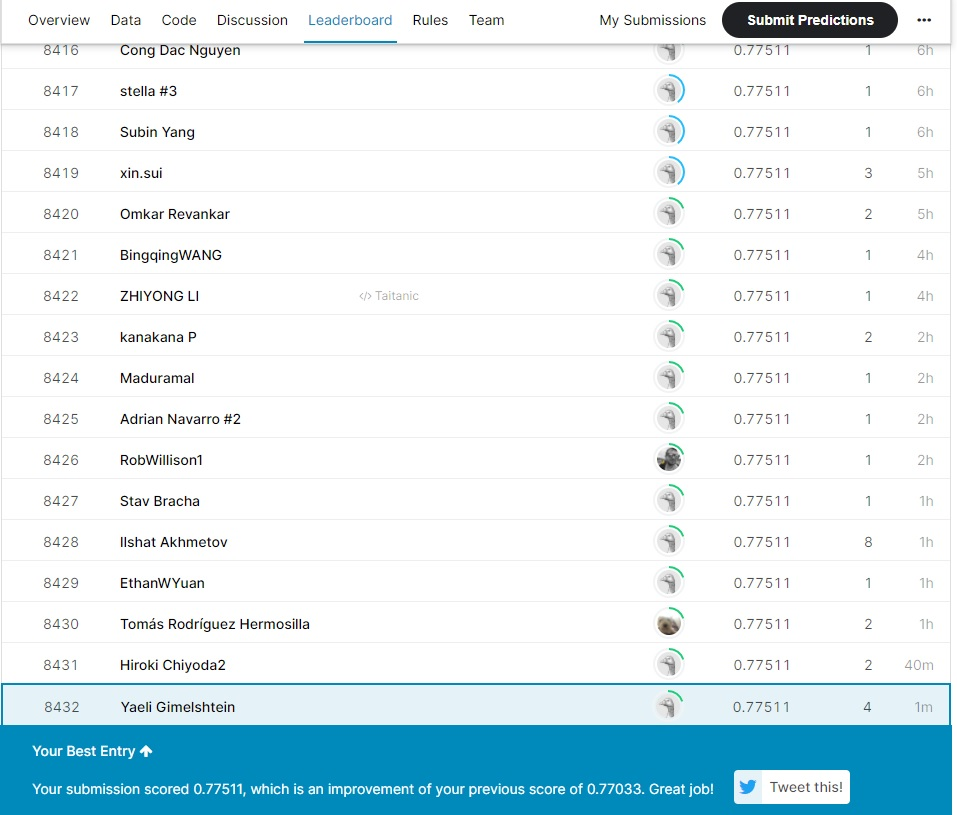

To sum up, we can see that MLP works a little bit better than Logistic Regression and tht makes since that MLP has layer of transforming featues and Logistic Regression doesnt.

1. Used some code of Almog's practice. 

2. https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix 
 
3. https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab





----------------------------------------------------------------------------------------------------------------------

## Exercise 3 ⏰

## Step #1: data investigation & feature engineering ☑

 

*   Now, unlike the first time I used this data, I will not drop any features on my own, but use the help of the `feature selection algorithm` 
*   Now, unlike the first time I used this data, I will use the `KNN algorithm` instead the models I used
*   Now, unlike the first time I used this data, I will use `CV` and not split the data to train and test
*   Now, unlike the first time I used this data, I will use the help of `Ensembles` and `Hyper parameters search`



In [ ]:
#Load the data
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As always, I do not need the ID column, so I'll drop it

In [ ]:
data.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Missing Values ⚛
Now, I will start by filling in missing values (or droping them)

In [ ]:
count_empty_values_in_each_column(data)

empty values
------------

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


I will fill up Age and Embarked and drop Cabin since it has 77% of missing values

In [ ]:
fill_na_mean(data, "Age")
fill_na_random_pick_column_distribution(data, "Embarked")
data.drop(columns='Cabin', inplace = True, axis =1) 
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
count_empty_values_in_each_column(data)

empty values
------------

Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0


I have deciced ti add some graphs to better understand the connection between the features.


*   There seems to be a large age distribution, both in the surviving population and in those who did not 
*   I can see that more men survuved than women and that most of them were first class
*   The largest number of survivors is from Port C



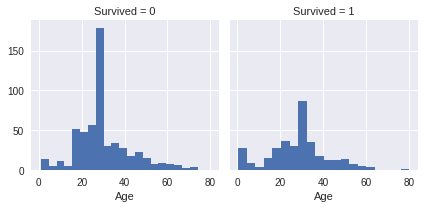

In [ ]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


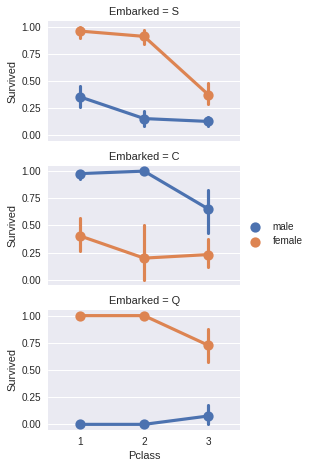

In [ ]:
grid = sns.FacetGrid(data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


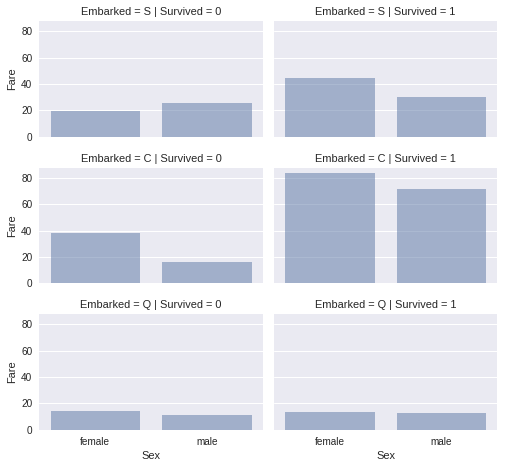

In [ ]:
grid = sns.FacetGrid(data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

###Removing columns ⚛
Also, I will remove `Ticket` and `Name` since there is no way for me to make it numeric

In [ ]:
data.drop(columns='Ticket', inplace = True, axis =1) 
data.drop(columns='Name', inplace = True, axis =1) 
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


###Converting categorical features ⚛

In [ ]:
# dummy encode the categorical variables in the df with get_dummies
data = pd.get_dummies(data, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)
data

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S
0,0,22.000000,1,0,7.2500,1,0,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,0,0,1
4,0,35.000000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,0


###Adding a new column ⚛

In [ ]:
# add new column for relatives from sibSp + Parch
data['Relatives'] = data.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)
data

,Survived,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,0,22.000000,1,0,7.2500,1,0,1,0,1,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0,1
2,1,26.000000,0,0,7.9250,0,0,1,0,1,0
3,1,35.000000,1,0,53.1000,0,0,0,0,1,1
4,0,35.000000,0,0,8.0500,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,1,0,0,1,0
887,1,19.000000,0,0,30.0000,0,0,0,0,1,0
888,0,29.699118,1,2,23.4500,0,0,1,0,1,3
889,1,26.000000,0,0,30.0000,1,0,0,0,0,0


## Hyper Parameters Search ⚡
I will check what is the best number of neighbors

In [ ]:
t = data['Survived'].copy()
x = data.copy().drop('Survived', axis=1)
cols = x.columns.to_list()

sc = StandardScaler()
x_norm = sc.fit_transform(x)
x_normal = pd.DataFrame(x_norm, columns=cols)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [ ]:
hyper_parameters = {'n_neighbors': list(range(1, 20))}

gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters).fit(x_normal, t)
print('Accuracy score for classification:')
print('gs_neigh_model', gs_neigh_model.best_score_)
print('best params', gs_neigh_model.best_params_)

num_neighbors = gs_neigh_model.best_params_["n_neighbors"]

Accuracy score for classification:
gs_neigh_model 0.8114556525014123
best params {'n_neighbors': 12}


## Feature Selection ⚡

I will start by checking out Backward Feature Selection using Scikit-learn RFE

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDClassifier

In [ ]:
#x_normal = pd.DataFrame(x_norm, columns=cols)
#x_normal

In [ ]:
selector = RFECV(SGDClassifier(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=15, random_state=1)).fit(x_normal, t)
x_less_features = x_normal.loc[:, selector.support_]
x_less_features

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


,Age,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_S
0,-0.592481,0.737695,-0.510152,0.902587,0.617572
1,0.638789,-1.355574,-0.510152,-1.107926,-1.619244
2,-0.284663,-1.355574,-0.510152,0.902587,0.617572
3,0.407926,-1.355574,-0.510152,-1.107926,0.617572
4,0.407926,0.737695,-0.510152,0.902587,0.617572
...,...,...,...,...,...
886,-0.207709,0.737695,1.960202,-1.107926,0.617572
887,-0.823344,-1.355574,-0.510152,-1.107926,0.617572
888,0.000000,-1.355574,-0.510152,0.902587,0.617572
889,-0.284663,0.737695,-0.510152,-1.107926,-1.619244


## Step #2: creating the model and training it ☑

I chose to use the KNN model because of its simplicity and because of its high success rates

## Ensamles ⚡
I will create and train 2 models in different types:


1.   `Bagging` = Create ensembles by different samples from the training set. That is, coaches different models on different subsets of the data, and the output from the substrates or the majority decision.
2.   `Boosting` = Create ensembles of models are trained on different training groups so that each model focuses in the examples that his predecessors erred in. That is, use a series of "weak" models) with a high bias error (and each model concentrates on learning the cases that the other models failed to classify correctly)



In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=num_neighbors), n_estimators=20, random_state=1, bootstrap=False).fit(x_norm, t)
print('Accuracy score for classification:')
print('bagging_model', bagging_model.score(x_norm, t).mean())

Accuracy score for classification:
bagging_model 0.8294051627384961


In [ ]:
boosting_model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=num_neighbors), n_estimators=20, random_state=1, bootstrap=True).fit(x_norm, t)
print('Accuracy score for classification:')
print('boosting_model', boosting_model.score(x_norm, t).mean())

Accuracy score for classification:
boosting_model 0.8282828282828283


In [ ]:
bagging_model_less = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=num_neighbors), n_estimators=20, random_state=1, bootstrap=False).fit(x_less_features, t)
print('Accuracy score for classification:')
print('bagging_fold_model', bagging_model_less.score(x_less_features, t).mean())

Accuracy score for classification:
bagging_fold_model 0.8305274971941639


In [ ]:
boosting_model_less = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=num_neighbors), n_estimators=20, random_state=1, bootstrap=True).fit(x_less_features, t)
print('Accuracy score for classification:')
print('boosting_model', boosting_model_less.score(x_less_features, t).mean())

Accuracy score for classification:
boosting_model 0.8294051627384961


## CV ⚡
All of the tranings gave good accuracy score. I will also use CV to double check myself.

In [ ]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import LeavePOut
!pip install --upgrade plotly
import plotly.express as px

     |████████████████████████████████| 26.5 MB 52.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [ ]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids] # Create train X and t
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids] # Create valid X and t
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train) #train the model

        y_train = model.predict(X_train) # Getting predictions
        y_val = model.predict(X_val)
        
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train),  metrics.log_loss(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val),  metrics.log_loss(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

In [ ]:
#traning the model in CV
get_cv_score_and_loss(x_normal, t, bagging_model,k=10, show_score_loss_graphs=True, use_pbar=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_normal, t, boosting_model,k=10, show_score_loss_graphs=True, use_pbar=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t, bagging_model_less ,k=10, show_score_loss_graphs=True, use_pbar=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
get_cv_score_and_loss(x_less_features, t, boosting_model_less ,k=10, show_score_loss_graphs=True, use_pbar=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

### Confusion Matrix ⚡

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def display_con_mat(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot = True, cmap = plt.cm.BuGn, fmt = "g")
  ax.set_title("Cofusion Matrix")
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ## Display the visualization of the Confusion Matrix.
  plt.show()

In [ ]:
#save all predictions of all models on train
y_model_bagg1 = bagging_model.predict(x_normal)
matrix1 = confusion_matrix(t,y_model_bagg1 )

y_model_boot1 = boosting_model.predict(x_normal)
matrix2 = confusion_matrix(t,y_model_boot1 )

y_model_bagg2 = bagging_model_less.predict(x_less_features)
matrix3 = confusion_matrix(t,y_model_bagg2 )

y_model_boot2 = boosting_model_less.predict(x_less_features)
matrix4 = confusion_matrix(t,y_model_boot2 )

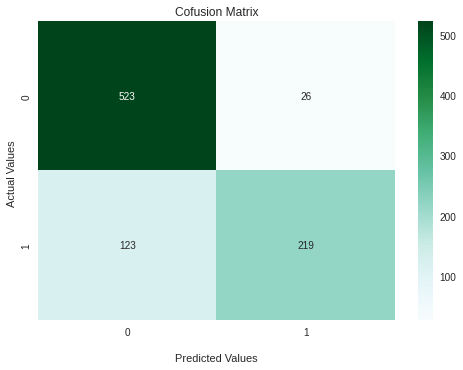

In [ ]:
#displaying all the matrixs
display_con_mat(matrix1)

As can seen, the model predicted a good amount of `tn`, `tp` but also, had alot of `fn`. this means that the `false negative rate` is high.

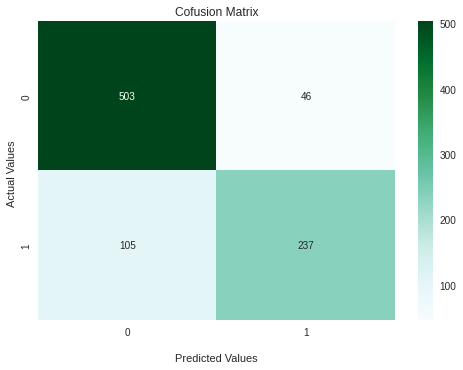

In [ ]:
display_con_mat(matrix2)

As can seen, the model predicted a good amount of `tn`, `tp`. from the first model we can see less `fn` and a bit more `fp`. the threshold here is more to the right

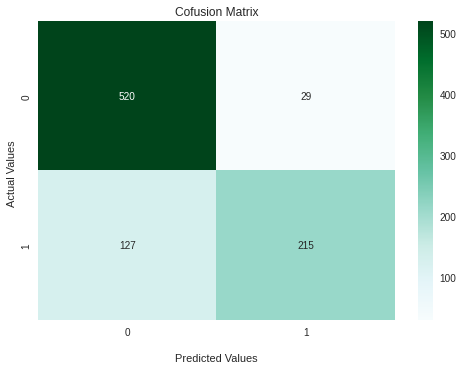

In [ ]:
display_con_mat(matrix3)

As can seen, the model predicted a good amount of `tn`, `tp` but also, had alot of `fn`. this means that the false negative rate is high.

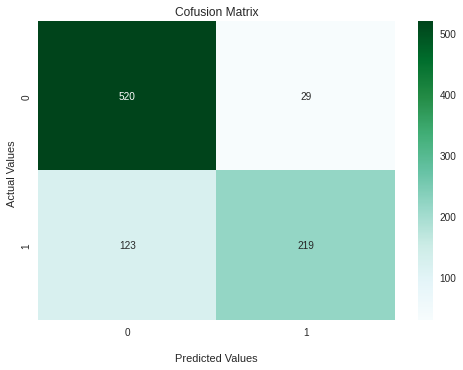

In [ ]:
display_con_mat(matrix4)

As can seen, the model predicted a good amount of `tn`, `tp`.from the first model we can see less `fn` and a bit more `fp`. the threshold here is more to the right

In coclusion, It seems that the best model is `bagging_model`since it has the highest `tp`, `tn` count (742 correct predictions)

### KPI's ⚡
I will show

*   Accuracy for each category = how much `tp` and `tn` we predictied from all the data , how accurate we are
*   precision for each category = how much `tp` we predicted from all positives we predicted  
*   recall for each category = how much `tp` we predicted from all true positives
*   f-1 score for each category = in case one of the categories is rare, this mesures both recall and precision
*   balanced accuracy to all the categories = means the accuracy
*   specificity for each category = how much `tn` we predicted from all true negatives


It is derived directly from the confusion matrix






In [ ]:
def kpi(matrix):
  tn, fp, fn, tp = matrix.ravel()
  #calc
  Accuracy= (tp + tn) / (tp + tn + fp + fn)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)
  specificity = tn / (tn + fp)
  F1 = (2 * precision * recall) / (precision + recall)
  Balanced_Accuracy = (recall + specificity) / 2

  #print
  print("Accuracy is ",Accuracy )
  print("Precision is", precision)
  print("Recall is ", recall)
  print("Specificity", specificity)
  print("F1 is ", F1)
  print("Balanced Accuracy is " , Balanced_Accuracy)

In [ ]:
kpi(matrix1)

Accuracy is  0.8327721661054994
Precision is 0.8938775510204081
Recall is  0.6403508771929824
Specificity 0.9526411657559198
F1 is  0.746166950596252
Balanced Accuracy is  0.7964960214744512


In [ ]:
kpi(matrix2)

Accuracy is  0.8305274971941639
Precision is 0.8374558303886925
Recall is  0.6929824561403509
Specificity 0.9162112932604736
F1 is  0.7584000000000001
Balanced Accuracy is  0.8045968747004122


In [ ]:
kpi(matrix3)

Accuracy is  0.8249158249158249
Precision is 0.8811475409836066
Recall is  0.6286549707602339
Specificity 0.9471766848816029
F1 is  0.7337883959044368
Balanced Accuracy is  0.7879158278209184


In [ ]:
kpi(matrix4)

Accuracy is  0.8294051627384961
Precision is 0.8830645161290323
Recall is  0.6403508771929824
Specificity 0.9471766848816029
F1 is  0.7423728813559322
Balanced Accuracy is  0.7937637810372926


It looks like all the models have pretty much the same scores, so I will use and submit test on them all 

## Step #3: working on the test ☑

In [ ]:
# working on TEST data now
test_dataset = pd.read_csv('test.csv')

#save the id for submission
test_id = test_dataset['PassengerId']

test_dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_dataset.drop(columns='PassengerId', inplace = True, axis =1) # remove the PassengerId column!
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
count_empty_values_in_each_column(test_dataset)

empty values
------------

Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [ ]:
fill_na_mean(test_dataset, "Age")
fill_na_random_pick_column_distribution(test_dataset, "Fare")
test_dataset.drop(columns='Cabin', inplace = True, axis =1) 
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [ ]:
count_empty_values_in_each_column(test_dataset)

empty values
------------

Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Embarked: 0


In [ ]:
test_dataset.drop(columns='Ticket', inplace = True, axis =1) 
test_dataset.drop(columns='Name', inplace = True, axis =1) 
test_dataset

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [ ]:
test_dataset = pd.get_dummies(test_dataset, columns=['Sex', 'Pclass', 'Embarked'], prefix=["sex_type", "Pclass_type", "Embarked_type"], drop_first=True)
test_dataset

,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S
0,34.50000,0,0,7.8292,1,0,1,1,0
1,47.00000,1,0,7.0000,0,0,1,0,1
2,62.00000,0,0,9.6875,1,1,0,1,0
3,27.00000,0,0,8.6625,1,0,1,0,1
4,22.00000,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,1,0,1,0,1
414,39.00000,0,0,108.9000,0,0,0,0,0
415,38.50000,0,0,7.2500,1,0,1,0,1
416,30.27259,0,0,8.0500,1,0,1,0,1


In [ ]:
test_dataset['Relatives'] = test_dataset.apply(lambda row : int(row['SibSp'] + row['Parch']), axis=1)
test_dataset

,Age,SibSp,Parch,Fare,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_Q,Embarked_type_S,Relatives
0,34.50000,0,0,7.8292,1,0,1,1,0,0
1,47.00000,1,0,7.0000,0,0,1,0,1,1
2,62.00000,0,0,9.6875,1,1,0,1,0,0
3,27.00000,0,0,8.6625,1,0,1,0,1,0
4,22.00000,1,1,12.2875,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,1,0,1,0,1,0
414,39.00000,0,0,108.9000,0,0,0,0,0,0
415,38.50000,0,0,7.2500,1,0,1,0,1,0
416,30.27259,0,0,8.0500,1,0,1,0,1,0


In [ ]:
sc = StandardScaler()
x_norm_test = sc.fit_transform(test_dataset)
x_norm_test

array([[ 0.3349926 , -0.49947002, -0.4002477 , ...,  2.84375747,
        -1.35067551, -0.5534426 ],
       [ 1.32553003,  0.61699237, -0.4002477 , ..., -0.35164743,
         0.74037028,  0.10564289],
       [ 2.51417495, -0.49947002, -0.4002477 , ...,  2.84375747,
        -1.35067551, -0.5534426 ],
       ...,
       [ 0.65196458, -0.49947002, -0.4002477 , ..., -0.35164743,
         0.74037028, -0.5534426 ],
       [ 0.        , -0.49947002, -0.4002477 , ..., -0.35164743,
         0.74037028, -0.5534426 ],
       [ 0.        ,  0.61699237,  0.61989583, ..., -0.35164743,
        -1.35067551,  0.76472838]])

In [ ]:
x_norm_test_less = pd.DataFrame(x_norm_test, columns=cols)
x_norm_test_less = x_norm_test_less.loc[:, selector.support_]
x_norm_test_less

,Age,sex_type_male,Pclass_type_2,Pclass_type_3,Embarked_type_S
0,0.334993,0.755929,-0.534933,0.957826,-1.350676
1,1.325530,-1.322876,-0.534933,0.957826,0.740370
2,2.514175,0.755929,1.869391,-1.044031,-1.350676
3,-0.259330,0.755929,-0.534933,0.957826,0.740370
4,-0.655545,-1.322876,-0.534933,0.957826,0.740370
...,...,...,...,...,...
413,0.000000,0.755929,-0.534933,0.957826,0.740370
414,0.691586,-1.322876,-0.534933,-1.044031,-1.350676
415,0.651965,0.755929,-0.534933,0.957826,0.740370
416,0.000000,0.755929,-0.534933,0.957826,0.740370


In [ ]:
y_test_model_bagging1 = bagging_model.predict(x_norm_test)
y_test_model_boosting1 = boosting_model.predict(x_norm_test)
y_test_model_bagging2 = bagging_model_less.predict(x_norm_test_less)
y_test_model_boosting2 = boosting_model_less.predict(x_norm_test_less)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but BaggingClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but BaggingClassifier was fitted with feature names



In [ ]:
result = pd.DataFrame()
result['PassengerId'] = test_id
result['Survived'] = y_test_model_bagging1
result.to_csv('Submission-bagging1.csv', index = False)

In [ ]:
result2 = pd.DataFrame()
result2['PassengerId'] = test_id
result2['Survived'] = y_test_model_bagging2
result2.to_csv('Submission-bagging2.csv', index = False)

In [ ]:
result3 = pd.DataFrame()
result3['PassengerId'] = test_id
result3['Survived'] = y_test_model_boosting1
result3.to_csv('Submission-boosting1.csv', index = False)

In [ ]:
result4 = pd.DataFrame()
result4['PassengerId'] = test_id
result4['Survived'] = y_test_model_boosting2
result4.to_csv('Submission-boosting2.csv', index = False)

## Submmitimg To Kaggle ⚡

I have submitted about three of four times, here is my best submmisiom

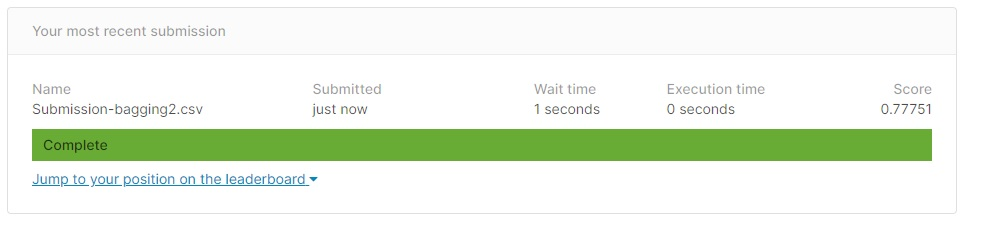

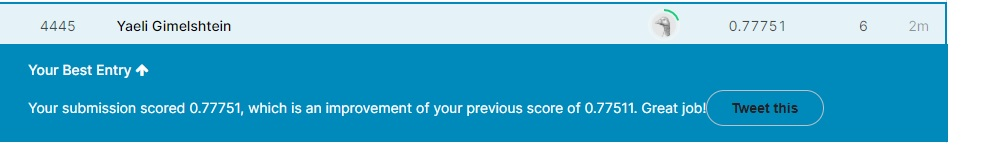

## Sum up ⚡

To sum up, I chose to build 4 models that are all based on knn algorithm where in two of them I used fewer features (the selected ones) and in two I used all the properties. In addition, models were tested according to different ensemble methods, boosting and also bagging. I trained these models using the CV method and printed the analysis of the prediction results using different methods: confusion matrix, KPI and graphs. Finally, the best model was the KNN-based bootstrap model with fewer features that resulted in an accuracy of 0.777.





It is important to note that the models were almost identical in their level of accuracy.


> Did not work: Feature selection method does not know how to get a KNN model so I changed it to a SGDClassifier. It is clear to me that this is an inaccurate thing and it was preferable that the choice of features be based on the model I worked with.





## Bibliography ⚡

1.   https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/
2.   Almog's Notebook
3.   https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook



In [ ]:
%%shell
jupyter nbconvert --to html /content/Machine_Learning_hw1_3.ipynb

[NbConvertApp] Converting notebook /content/Machine_Learning_hw1_3.ipynb to html
[NbConvertApp] Writing 2099281 bytes to /content/Machine_Learning_hw1_3.html
